# Laboratorio: Aprendizaje Supervisado

## ¿A dónde realizan su primera reserva los nuevos usuarios de Airbnb?

Durante este práctico vamos a trabajar con todos los datos provistos por [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data) en Kaggle.

## Objetivo y alcance:

En este laboratorio vamos a aplicar todo lo aprendido en las materias previas y lo vamos a complementar con lo aprendido en la materia de __Aprendizaje Supervisado__. La idea principal es poder armar una notebook completa, partiendo desde el preprocesamiento y curación de los datos, hasta la elección final de un modelo y su posterior testeo.

Tal vez este laboratorio sea un poco más extenso que los anteriores, pero eso se debe a que estamos uniendo las diferentes *piezas* de un proyecto de aprendizaje supervisado.

## Estructura del informe:

  * Jupyter Notebook con el análisis realizado.
  
---

## Introducción:

En el presente laboratorio, vamos a tomar como referencia el siguiente [Notebook Ejemplo](https://www.kaggle.com/malgoro39/predicci-n-de-destinos-airbnb). En dicho notebook, el autor realiza un análisis exhaustivo y además explica de una manera muy didáctica las decisiónes tomadas y los conceptos teóricos involucrados. 

Tratemos de imitar y mejorar el trabajo realizado :)

En este caso, vamos a trabajar con todos los datos originales de __Airbnb__:
* __ager_gender_bkts.csv__
* __countries.csv__
* __sessions.csv__
* __test_users.csv__ / __test_users_2.csv__

Por una cuestión de tamaño de los datasets, éstos se encuentran comprimidos en el archivo __/Datos/original_data.zip__. Además la notebook de ejemplo se encuentra en __/Notebooks/Ejemplos/Ejemplo_Laboratorio_Supervisado.ipynb__.

## Tareas:

1. __Análisis y Visualización de datos__: Realizar un breve análisis de los datasets antes mencionados.
2. __Curación de datos__: Realizar la correspondiente curación de los mismos.
3. __Feature Engineering__: Tomando como ejemplo la notebook antes mencionada aplicar un poco de ingeniería de features, por ejemplo: generar nuevos features, mergear datasets, etc.
4. __Selección de un modelo de Aprendizaje Supervisado__: Aplicar distintos modelos de aprendizaje supervisado al dataset generado en el punto anterior.
5. __Ajuste de hiperparámetros__: Realizar una búsqueda de hiperparámetros que permitan mejorar la clasificación de los modelos escogidos.
6. __Testing de precisión__: Medir la precisión de cada uno de tus modelos (con datos no conocidos).
7. __¿Qué modelo generó los mejores resultados?__

## 1. Análisis y Visualización de datos

In [82]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
dataset_path = "..//datos//"

### Countries

In [84]:
countries_df = pd.read_csv(dataset_path+"countries.csv") 
countries_df.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


In [85]:
countries_df

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


### Sessions

In [86]:
sessions_df = pd.read_csv(dataset_path+"sessions.csv") 
sessions_df.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [87]:
sessions_df.sample(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
678820,wzodti9kqw,lookup,NaN,NaN,Mac Desktop,20.0
6345028,rrfoow8vtz,show,view,p3,Windows Desktop,95.0
5814138,iph2su062s,social_connections,data,user_social_connections,iPhone,1226.0
10034193,jdno5s2jqx,dashboard,view,dashboard,Mac Desktop,1379.0
6578488,krgjnbaojd,show,view,user_profile,iPhone,740.0
9110313,1l3puyb301,show,view,p3,Windows Desktop,832899.0
7923020,3p66s7nj0e,reviews,data,listing_reviews,Android Phone,230.0
952460,v5du2fepr6,personalize,data,wishlist_content_update,iPad Tablet,1343.0
611983,60esauj9rn,similar_listings,data,similar_listings,Mac Desktop,320.0
8726577,w1n4o2xsxw,social_connections,data,user_social_connections,iPhone,103.0


In [88]:
len(sessions_df)

10567737

#### Verificamos si hay valores nulos en el dataset

In [89]:
sessions_df.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [90]:
sessions_df[ sessions_df.user_id.isnull() == False ].head(15)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [91]:
len(sessions_df.action.unique())

360

Veamos el campo __action__ y su relacion con __action_type__ y __action_detail__

In [92]:
sessions_df.action.unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'hosting_social_proof',
       'decision_tree', 'recent_reservations', 'faq_experiment_ids',
       'multi', 'active', 'dashboard', 'create', 'confirm_email',
       'show_personalize', 'verify', 'pending', 'requested', 'concierge',
       'faq', 'clear_reservation', 'cancellation_policies',
       'track_page_view', 'update', 'my', 'campaigns', 'notifications',
       'listings', 'unavailabilities', 'ajax_lwlb_contact',
       'ajax_check_dates', 'qt2', 'request_new_confirm_email',
       'ajax_photo_widget_form_iframe', 'facebook_auto_login', 'identity',
       'qt_reply_v2', 'travel_plans_current', 'complete_status',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'calendar_tab_inner2', 'other_hosting_reviews',
       'social_connections', 'relat

In [93]:
len(sessions_df.action_type.unique())

11

In [94]:
sessions_df.action_type.unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

In [95]:
len(sessions_df.action_detail.unique())

156

In [96]:
sessions_df.action_detail.unique()

array([nan, 'view_search_results', 'wishlist_content_update',
       'similar_listings', 'change_trip_characteristics', 'p3',
       'header_userpic', 'contact_host', 'message_post', '-unknown-',
       'dashboard', 'create_user', 'confirm_email_link',
       'user_profile_content_update', 'user_profile', 'pending', 'p5',
       'create_phone_numbers', 'cancellation_policies', 'user_wishlists',
       'change_contact_host_dates', 'wishlist', 'message_thread',
       'request_new_confirm_email', 'send_message', 'your_trips',
       'login_page', 'login', 'login_modal', 'toggle_archived_thread',
       'p1', 'profile_verifications', 'edit_profile', 'oauth_login',
       'post_checkout_action', 'account_notification_settings',
       'update_user_profile', 'oauth_response', 'signup_modal',
       'signup_login_page', 'at_checkpoint', 'manage_listing',
       'create_listing', 'your_listings', 'profile_references',
       'list_your_space', 'popular_wishlists', 'listing_reviews_page',
    

Verificamos que, si __action_type__ es null, tambien lo es __action_detail__

In [97]:
sessions_df[ sessions_df.action_type.isnull() == True ].action_detail.unique()

array([nan], dtype=object)

Veamos que valores hay para __action__ cuando __action_type__ es nulo

In [98]:
sessions_df[ sessions_df.action_type.isnull()].action.unique()

array(['lookup', 'show', 'track_page_view', 'widget', 'uptodate', 'index',
       'campaigns', 'currencies', 'localization_settings', 'update',
       'phone_verification', 'satisfy', 'track_activity', 'check',
       'signed_out_modal', 'disaster_action', 'similar_listings_v2',
       'braintree_client_token'], dtype=object)

In [99]:
sessions_df[ sessions_df.action.isnull()].action_type.unique()

array(['message_post'], dtype=object)

Vamos a reemplazar el null en estos campos, por un valor fijo

In [100]:
sessions_df['action'].fillna('unknown_action', inplace=True) 
sessions_df['action_type'].fillna('unknown_action_type-', inplace=True) 
sessions_df['action_detail'].fillna('unknown_action_detail-', inplace=True) 

In [101]:
sessions_df.isnull().sum()

user_id           34496
action                0
action_type           0
action_detail         0
device_type           0
secs_elapsed     136031
dtype: int64

Analicemos el __user_id__, porque puede dejar elementos fuera del merge con usuarios

In [102]:
len(sessions_df[sessions_df.user_id.isnull() == True]) / len(sessions_df)

0.003264275028797556

La proporcion de user_id en null, es baja (3%). Vamos a eliminarlos

In [103]:
sessions_df.dropna(subset=['user_id'], inplace=True)

In [104]:
sessions_df.isnull().sum()

user_id               0
action                0
action_type           0
action_detail         0
device_type           0
secs_elapsed     135483
dtype: int64

Tratamiento de los nulos de secs_elapsed

In [105]:
secs_elapsed_median = sessions_df.secs_elapsed.median()
print(secs_elapsed_median)
sessions_df['secs_elapsed'].fillna(secs_elapsed_median, inplace=True) 

1146.0


In [106]:
sessions_df.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

Listo, no quedan null values en sessions

In [107]:
sessions_df['device_type'].value_counts()

Mac Desktop                         3585886
Windows Desktop                     2648521
iPhone                              2096749
Android Phone                        835991
iPad Tablet                          681836
Android App Unknown Phone/Tablet     272820
-unknown-                            210059
Tablet                               139859
Linux Desktop                         27968
Chromebook                            22272
iPodtouch                              8186
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

Veamos como se distribuye el __device_type__ por usuario 

In [108]:
device_type_per_user_df = sessions_df.groupby('user_id')['device_type'].nunique()

In [109]:
device_type_per_user_df

user_id
00023iyk9l    2
0010k6l0om    1
001wyh0pz8    1
0028jgx1x1    2
002qnbzfs5    2
0031awlkjq    1
0035hobuyj    1
00378ocvlh    1
00389675gq    2
003iamz20l    1
0048rkdgb1    1
0057snrdpu    2
005jc3nbmb    2
005v5uf4dh    1
0063bawn05    1
006ml14zc1    1
006mls2sjw    1
006t3vhawl    1
006z8b0uws    2
0075z9e9xv    2
007gj7kqdk    1
009a40t3dk    3
00a8dbifj8    1
00allnceb8    1
00an0o6c07    2
00b9hfwaak    1
00bn6hu437    1
00bowi9sn3    1
00bqkh0g5i    1
00bxmflswn    2
             ..
zzq90ckj2z    1
zzqb2sn066    2
zzr1rkdsh9    1
zzrnx9rqi5    1
zzsoxtv8zb    2
zzsslqqkee    1
zzsszlux3t    1
zzswqjsqy4    1
zzt5gpsyqa    2
zzt8w28nl5    2
zztaeo9wd5    2
zztkv1gkse    1
zzu3u71odh    1
zzu6ezwap2    2
zzunwylrfv    3
zzuy4rvdki    1
zzv6z6rjr9    1
zzv8sgicbk    1
zzvatt4dio    1
zzvg4emw5w    1
zzvr84im58    2
zzw7kydxfa    1
zzx06inhbv    1
zzx0hfd74v    1
zzx5wp3lqu    2
zzxox7jnrx    1
zzy7t0y9cm    1
zzysuoqg6x    1
zzywmcn0jv    1
zzzlylp57e    1
Name: device_typ

In [110]:
device_type_per_user_df.unique()

array([2, 1, 3, 4, 5, 6], dtype=int64)

In [111]:
device_type_per_user_df.describe()

count    135483.000000
mean          1.315560
std           0.567364
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: device_type, dtype: float64

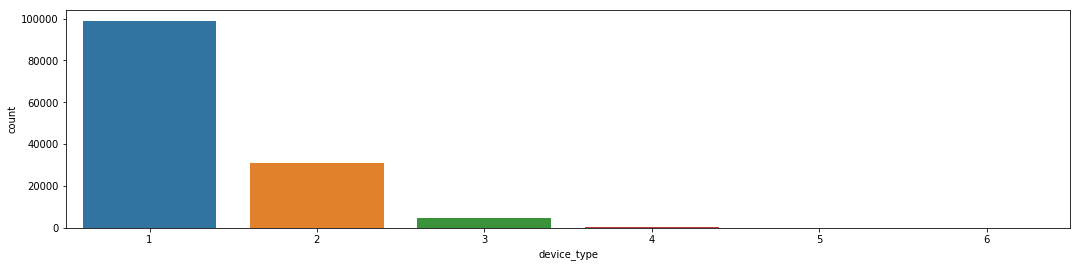

In [112]:
plt.figure(figsize=(18,4))
sns.countplot(device_type_per_user_df)

La cantidad de usuarios que usan mas de un dispositivo es un dato que vamos a extraer, como una nueva feature

### Age_Gender_Bkts

In [113]:
age_gender_df = pd.read_csv(dataset_path+"age_gender_bkts.csv") 

In [114]:
age_gender_df.head(10)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [115]:
len(age_gender_df)

420

In [116]:
age_gender_df.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


Verificamos si hay valores nulos en el dataset

In [117]:
age_gender_df.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

## Test_users

In [118]:
train_users_df = pd.read_csv( dataset_path + "train_users_2.csv", 
                            parse_dates=["date_account_created","timestamp_first_active", "date_first_booking"]) 

In [119]:
len(train_users_df)

213451

In [120]:
train_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [121]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [122]:
train_users_df.date_account_created.unique()

array(['2010-06-28T00:00:00.000000000', '2011-05-25T00:00:00.000000000',
       '2010-09-28T00:00:00.000000000', ...,
       '2014-06-27T00:00:00.000000000', '2014-06-29T00:00:00.000000000',
       '2014-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

### Tratamiento de fechas

In [123]:
def date_convert_to_epoch( date ):
    # date is a pandas datetime
    # https://stackoverflow.com/questions/35630098/convert-a-column-of-datetimes-to-epoch-in-python
    
    return date.astype('int64')//1e9


In [124]:
train_users_df['date_account_created'] = date_convert_to_epoch( train_users_df.date_account_created )
train_users_df['timestamp_first_active'] = date_convert_to_epoch( train_users_df.timestamp_first_active )
train_users_df['date_first_booking'] = date_convert_to_epoch( train_users_df.date_first_booking )

### Tratamiento de __age__

Tratamos los datos faltantes en __age__ y eliminamos outliers

In [125]:
train_users_df.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

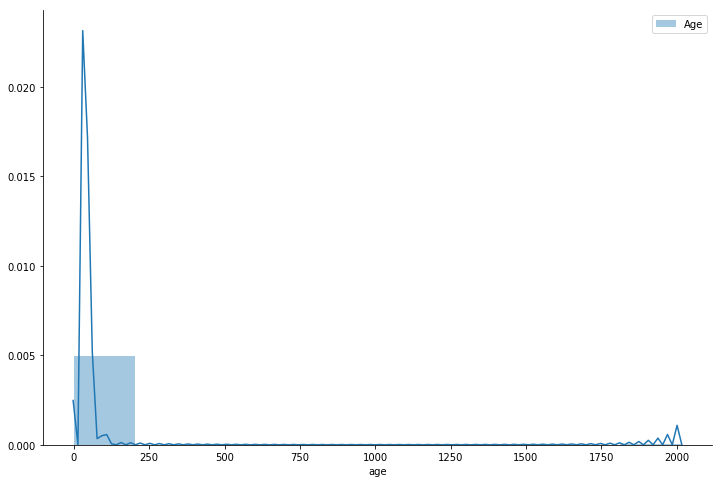

In [126]:
plt.figure(figsize=(12,8))
sns.distplot(train_users_df['age'].dropna(),bins=10, label='Age')
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()

In [127]:
train_users_df = train_users_df[ train_users_df.age < 100 ]

In [128]:
train_users_df = train_users_df[ train_users_df.age > 13 ]

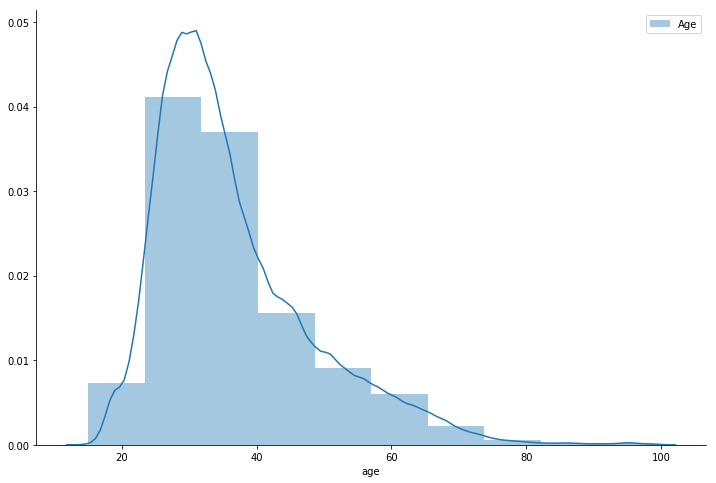

In [129]:
plt.figure(figsize=(12,8))
sns.distplot(train_users_df['age'].dropna(),bins=10, label='Age')
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()

### Tratamiento de __first_affiliate_tracked__ y otros relacionados

In [130]:
train_users_df.isnull().sum()

id                            0
date_account_created          0
timestamp_first_active        0
date_first_booking            0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    1963
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
dtype: int64

In [131]:
train_users_df['first_affiliate_tracked'].unique()

array(['untracked', 'omg', 'linked', nan, 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [132]:
train_users_df.dropna(subset=['first_affiliate_tracked'], inplace=True)

### Tratamiento de __language__

In [133]:
train_users_df['language'].unique()

array(['en', 'de', 'fr', 'es', 'zh', 'ko', 'it', 'ru', 'ja', 'pt', 'nl',
       'sv', 'pl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'el', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

In [134]:
train_users_df.groupby('language')['language'].count()

language
ca         4
cs        18
da        33
de       406
el        22
en    116674
es       621
fi        11
fr       797
hr         2
hu        15
id        17
is         4
it       343
ja       128
ko       390
nl        52
no        20
pl        42
pt       167
ru       266
sv        78
th        17
tr        45
zh       898
Name: language, dtype: int64

In [135]:
len( train_users_df[ train_users_df['language']=="en" ]) /  len(train_users_df)

0.9636904270256876

Se observa una gran mayoría de usuarios con lenguaje "Ingles" (95%)  
Veamos cual es la distribucion en el resto de los casos

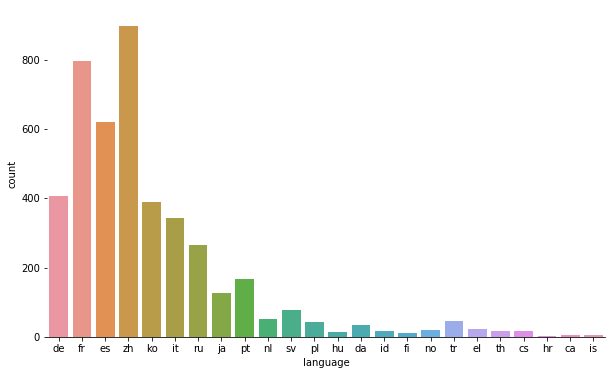

In [136]:
plt.figure(figsize=(10,6))

sns.countplot( data = train_users_df.query('language!="en"'), x='language')

sns.despine(left=True)

### Tratamiento de __gender__

In [137]:
train_users_df['gender'].unique()

array(['MALE', 'FEMALE', '-unknown-', 'OTHER'], dtype=object)

In [138]:
train_users_df.groupby('gender')['gender'].count()

gender
-unknown-    15924
FEMALE       55869
MALE         49052
OTHER          225
Name: gender, dtype: int64

Creo que la caracteristica de gender unknown es algo que deberiamos conservar, por lo que no vamos a hacer ningun tratamiento especial con ese valor. En el caso de "other", cuya frecuencia es muy baja, la reemplazamos por -unknown-

In [139]:
train_users_df.gender.replace('-unknown-','OTHER', inplace=True)

In [140]:
train_users_df.groupby('gender')['gender'].count()

gender
FEMALE    55869
MALE      49052
OTHER     16149
Name: gender, dtype: int64

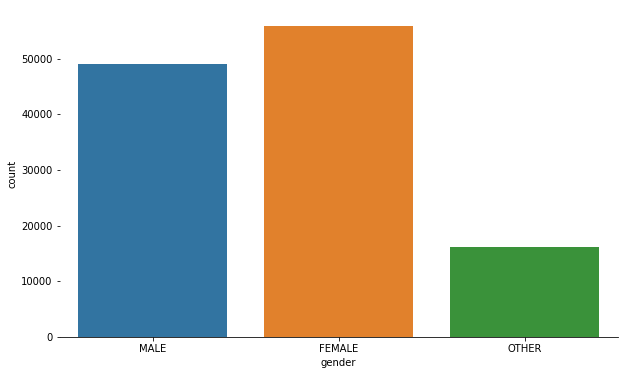

In [141]:
plt.figure(figsize=(10,6))

sns.countplot(  train_users_df['gender'] )

sns.despine(left=True)

### Tratamiento de los datos categoricos

In [142]:
print(train_users_df.gender.unique())
print(train_users_df.signup_method.unique())
#print(dataset.signup_flow.unique())
print(train_users_df.language.unique())
print(train_users_df.affiliate_channel.unique())
print(train_users_df.affiliate_provider.unique())
print(train_users_df.signup_app.unique())
print(train_users_df.first_device_type.unique())
print(train_users_df.first_affiliate_tracked.unique())
print(train_users_df.first_browser.unique())

['MALE' 'FEMALE' 'OTHER']
['facebook' 'basic' 'google']
['en' 'de' 'fr' 'es' 'zh' 'ko' 'it' 'ru' 'ja' 'pt' 'nl' 'sv' 'pl' 'hu'
 'da' 'id' 'fi' 'no' 'tr' 'el' 'th' 'cs' 'hr' 'ca' 'is']
['seo' 'direct' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
['google' 'direct' 'craigslist' 'other' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'wayn' 'gsp'
 'baidu' 'naver' 'yandex']
['Web' 'Moweb' 'iOS' 'Android']
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Desktop (Other)'
 'Android Tablet' 'Other/Unknown' 'iPad' 'Android Phone'
 'SmartPhone (Other)']
['untracked' 'omg' 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Opera' 'TenFourFox' 'Apple Mail' 'Silk' 'Camino' 'IE Mobile'
 'BlackBerry Browser' 'SeaMonkey' 'Mobile Firefox' 'Sogou Explorer'
 'IceWeasel' 'SiteKiosk' 'Opera Mini' 'M

In [143]:
def categories_convert( dataset, column ):
    # given a dataset and a column (categorical)
    # converts categories in codes, replacing all values in that column
    
    # Create a label (category) encoder object
    le = preprocessing.LabelEncoder()
    # Fit the encoder to the pandas column
    le.fit(dataset[column])
    
    # View encoder mapping
    # print(dict(zip(le.classes_,le.transform(le.classes_))))
    dataset[column] = le.transform(dataset[column])

In [144]:
categories_convert(train_users_df, "gender")
categories_convert(train_users_df, "first_device_type")
categories_convert(train_users_df, "signup_method")
categories_convert(train_users_df, "language")
categories_convert(train_users_df, "affiliate_channel")
categories_convert(train_users_df, "affiliate_provider")
categories_convert(train_users_df, "signup_app")
categories_convert(train_users_df, "first_device_type")
categories_convert(train_users_df, "first_affiliate_tracked")
categories_convert(train_users_df, "first_browser")

In [156]:
class_dict = {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}
train_users_df['country_destination'] = train_users_df['country_destination'].apply(lambda x: class_dict[x])

### Merge datasets __train_users__ y __sessions__

In [146]:
def merge_session_features(df):
    
    df['total_seconds'] = df['id'].apply(lambda x: sessions_total_secs_by_user[x] if x in sessions_total_secs_by_user else 0)
    df['average_seconds'] = df['id'].apply(lambda x: sessions_avg_secs_by_user[x] if x in sessions_avg_secs_by_user else 0)
    df['total_sessions'] = df['id'].apply(lambda x: sessions_total_sessions_by_user[x] if x in sessions_total_sessions_by_user else 1)
    df['number_of_devices'] = df['id'].apply(lambda x: sessions_number_of_devices_by_user[x] if x in sessions_number_of_devices_by_user else 1)

    
#    df['distinct_sessions'] = df['id'].apply(lambda x: distinct_sessions[x] if x in distinct_sessions else 0)
#    df['num_short_sessions'] = df['id'].apply(lambda x: num_short_sessions[x] if x in num_short_sessions else 0)
#    df['num_long_sessions'] = df['id'].apply(lambda x: num_long_sessions[x] if x in num_long_sessions else 0)
#    df['num_devices'] = df['id'].apply(lambda x: num_devices[x] if x in num_devices else 0)

    return df

In [147]:
# just to test if this user has sessions...

# test_df = sessions_df[ sessions_df['user_id']=='radlih4av9']
# test_df

In [148]:
# generation of the new user features

sessions_avg_secs_by_user = sessions_df.groupby('user_id')['secs_elapsed'].mean()
sessions_total_sessions_by_user = sessions_df.groupby('user_id')['action'].count()
sessions_total_secs_by_user = sessions_df.groupby('user_id')['secs_elapsed'].sum()
sessions_number_of_devices_by_user = sessions_df.groupby('user_id')['device_type'].nunique()

# do the merge between train_user and sessions
train_users_df = merge_session_features( train_users_df )


In [149]:
# generate a new attribute __booked__
# to represent if a user has booked a destination

train_users_df['has_booked'] = train_users_df['country_destination'].apply(lambda x: True if x != 'NDF' else False  )

In [150]:
# check how many users don't have session data

no_ses = train_users_df[ (train_users_df['total_seconds'] == 0) & (train_users_df['average_seconds'] == 0) & (train_users_df['total_sessions'] == 0)]
cant_users_no_session = len( no_ses )
print( cant_users_no_session / len(train_users_df) * 100)

0.0


In [157]:
train_users_df.sample(7)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,average_seconds,total_sessions,number_of_devices,has_booked
159919,0icc8vp2a2,1394064000,1394066481,1394150400,0,62.0,0,0,5,2,...,0,2,3,30,1,66904.0,9557.714286,7,1,True
38500,66pm63283o,1346112000,1346195599,-9223372037,0,62.0,0,0,5,2,...,6,2,3,30,0,0.0,0.000000,1,1,False
121723,fqsm42qnk9,1383523200,1383592378,1409356800,1,22.0,1,0,5,5,...,3,2,3,7,1,0.0,0.000000,1,1,True
3273,imhnskyf0g,1297641600,1297670153,1312502400,1,24.0,0,2,5,5,...,6,2,6,14,1,0.0,0.000000,1,1,True
7036,608o6z1ef4,1311897600,1311959675,1311984000,0,44.0,1,3,5,2,...,0,2,6,14,1,0.0,0.000000,1,1,True
211545,3ptfb6g5w9,1403827200,1403850346,-9223372037,1,30.0,1,0,5,5,...,3,2,6,13,0,2233415.0,21270.619048,105,1,False
119052,cmvxe8dswk,1382486400,1382562596,1409702400,0,26.0,1,0,5,2,...,6,2,3,7,1,0.0,0.000000,1,1,True


In [158]:
# write generated dataframe to a csv file, to read it later, in a different notebook

train_users_df.to_csv( dataset_path + 'modified_train_users.csv')

### Analizamos algunas posibles correlaciones

Podemos suponer, que para convertir, es necesario hacer mas de una sesion  
Veamos si hay alguna relación entre cantidad de sesiones y conversion

<Figure size 720x432 with 0 Axes>

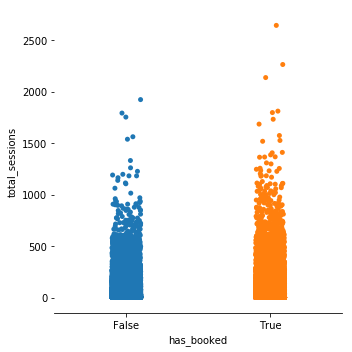

In [153]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x=train_users_df['total_sessions'], y=train_users_df['booked'] )
sns.catplot(data = train_users_df, x='has_booked' , y='total_sessions')
sns.despine(left=True)

<Figure size 720x432 with 0 Axes>

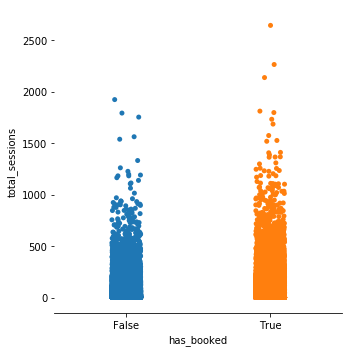

In [154]:
plt.figure(figsize=(10,6))
sns.catplot(data = train_users_df, x='has_booked' , y='total_sessions')
sns.despine(left=True)

In [155]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x=train_users_df['total_sessions'], y=train_users_df['booked'] )
sns.catplot(data=train_users_df, y='number_of_devices', x='booked' )
sns.despine(left=True)

ValueError: Could not interpret input 'booked'

<Figure size 720x432 with 0 Axes>

In [ ]:
#dataset_latam[['pf_identity','ef_score','hf_score']].corr(method='pearson')

corr_pearson = train_users_df[['number_of_devices','total_sessions', 'has_booked']].corr('pearson')
corr_pearson

Como puede observarse, no parece existir mayor correlacion entre la cantidad de sesiones y el numero de dispositivos, con respecto a si han hecho reserva.

### Predictions...

In [ ]:
class_dict = {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}

In [ ]:
# separate y from train_users
X = train_users_df.drop('country_destination', axis=1)
 cambiar esto y = train_users_df['country_destination'].apply(lambda x: class_dict[x])

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

le = preprocessing.LabelEncoder()
X['id'] = le.fit_transform(X['id'])

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, stratify=y)


In [ ]:
#classifiers = [RandomForestClassifier(verbose=1), LogisticRegression(verbose=1), GradientBoostingClassifier(verbose=True)]

#for classifier in classifiers:
#    classifier.fit(train_X, train_y)
#    print("Score: " + str(classifier.score(test_X, test_y)))

In [ ]:
# Load scikit's random forest classifier library

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train_X,train_y)

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
print(classification_report(test_y, y_pred))

In [ ]:
from utils import plot_confusion_matrix

plot_confusion_matrix(test_y, y_pred)

In [ ]:
print(class_dict)

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df